veri setini açalım 

In [5]:
import pandas as pd

# Load the dataset
file_path = '/workspaces/Python_final_project/BankChurners.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

eksik veri var mı kontrol edelim


In [9]:
# Eksik veri olup olmadığını kontrol etme
missing_data = df.isnull().sum()

# Eksik verilerin olup olmadığını gösterme
missing_data[missing_data > 0]


Series([], dtype: int64)

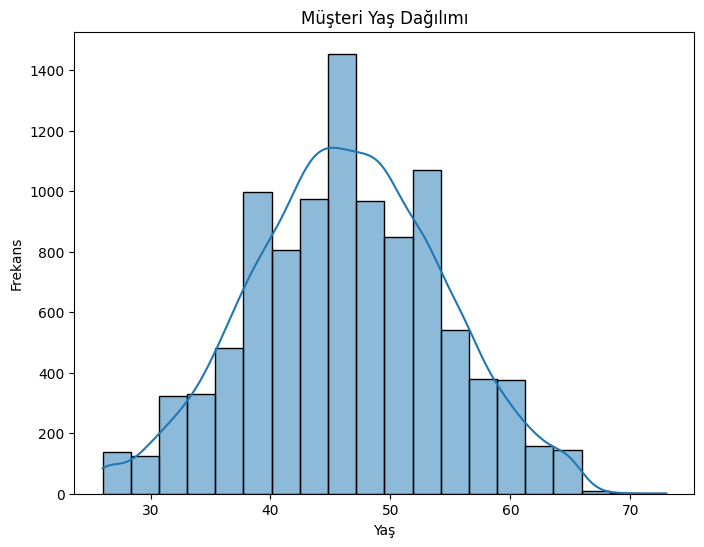

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Müşteri Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

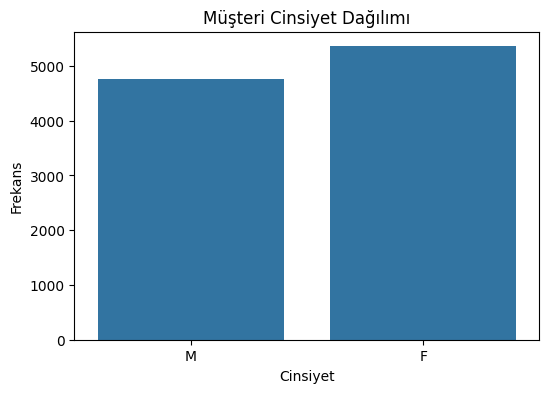

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Müşteri Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.show()

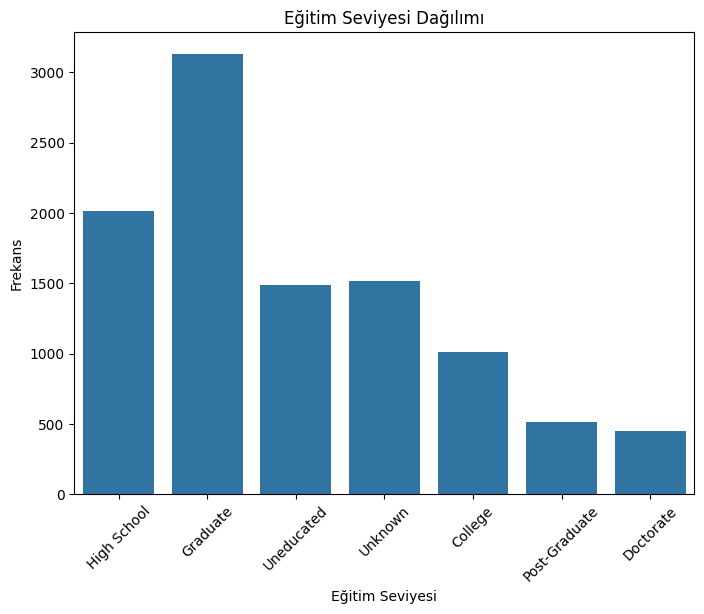

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

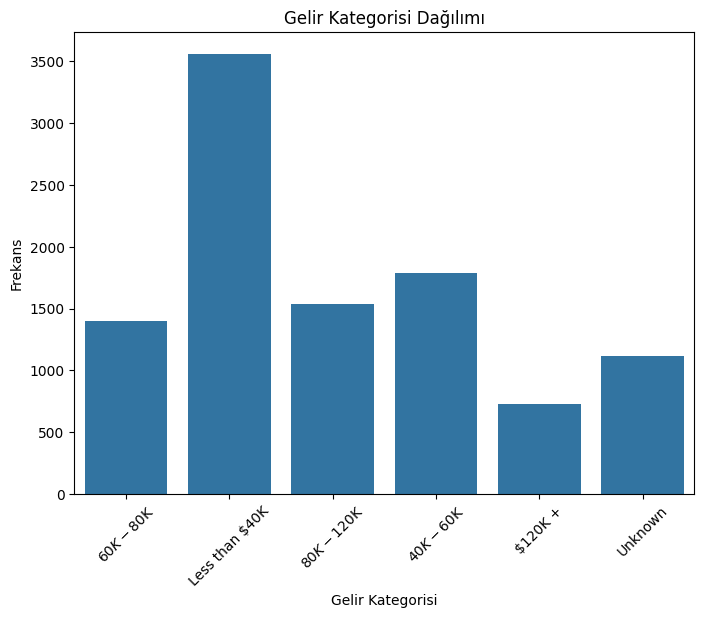

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df)
plt.title('Gelir Kategorisi Dağılımı')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

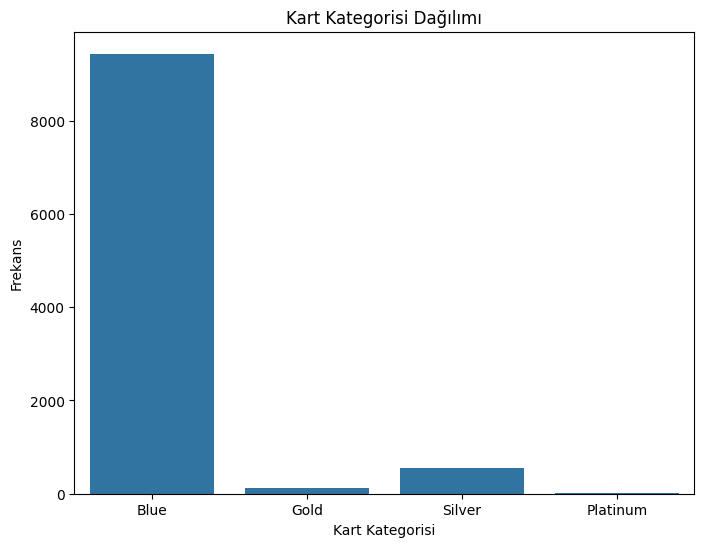

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Category', data=df)
plt.title('Kart Kategorisi Dağılımı')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Frekans')
plt.show()

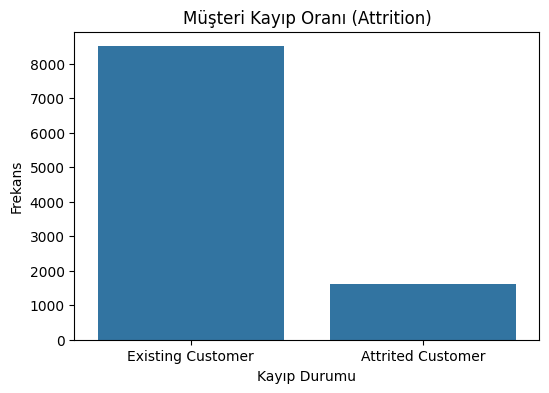

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Müşteri Kayıp Oranı (Attrition)')
plt.xlabel('Kayıp Durumu')
plt.ylabel('Frekans')
plt.show()